In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("market.csv")
df.head()

,Region,Product,Subsidiary,Stores,Sales,Inventory,Returns
0,Africa,Boot,Addis Ababa,12,29761,191821,769
1,Africa,Men's Casual,Addis Ababa,4,67242,118036,2284
2,Africa,Men's Dress,Addis Ababa,7,76793,136273,2433
3,Africa,Sandal,Addis Ababa,10,62819,204284,1861
4,Africa,Slipper,Addis Ababa,14,68641,279795,1771


In [38]:
# using group by with region contains highest sales
a = df.groupby("Region")["Sales"].sum()
a

Region
Africa                       2342588
Asia                          460231
Canada                       2041054
Central America/Caribbean    3081641
Eastern Europe               2394940
Middle East                  4333062
Pacific                      2296794
South America                2434783
United States                5503986
Western Europe               4873000
Name: Sales, dtype: int64

<Axes: xlabel='Region'>

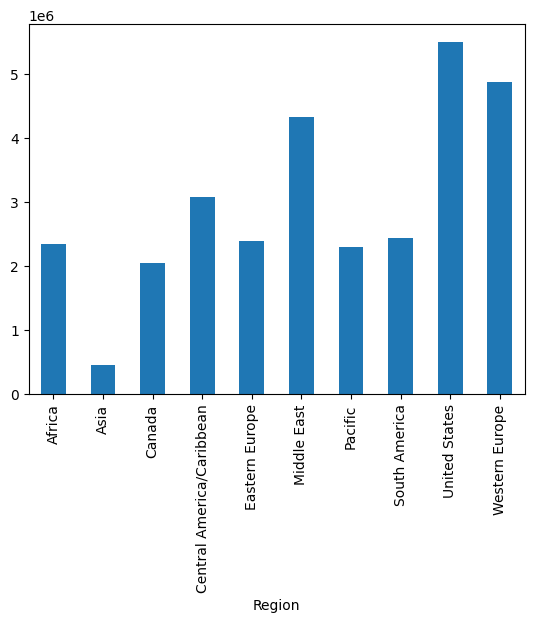

In [37]:
#barplot
a.plot(kind = "bar")

<Axes: xlabel='Product'>

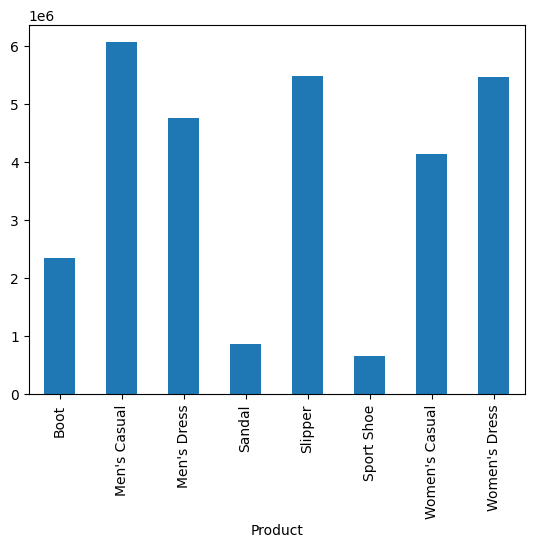

In [42]:
b = df.groupby("Product")["Sales"].sum()
b.plot(kind="bar")

<Axes: xlabel='Product'>

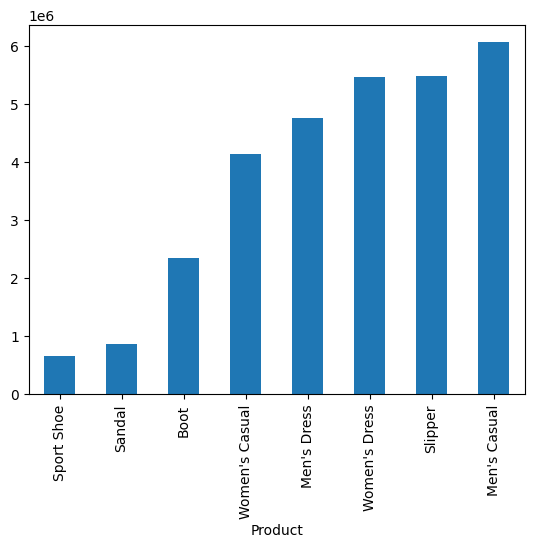

In [47]:
#sorting the graph in asc
c = b.sort_values(ascending = True)
c.plot(kind = "bar")

<Axes: ylabel='Sales'>

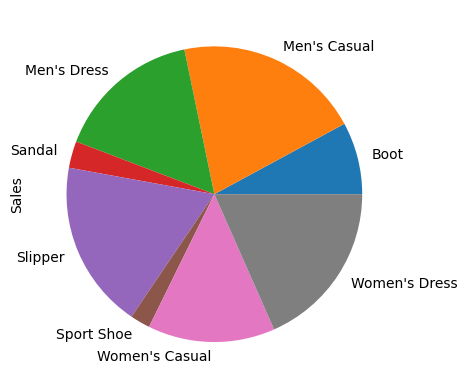

In [49]:
b.plot(kind = "pie")

<Axes: ylabel='Sales'>

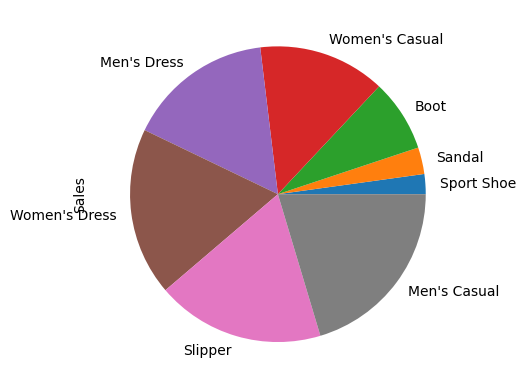

In [51]:
c.plot(kind = "pie")

<Axes: >

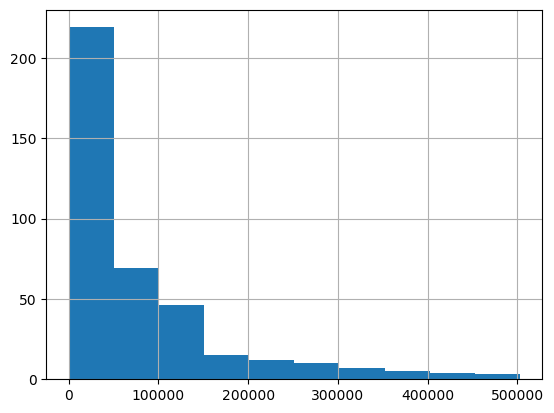

In [55]:
#histogram is for continuous data
df["Sales"].hist()

<Axes: >

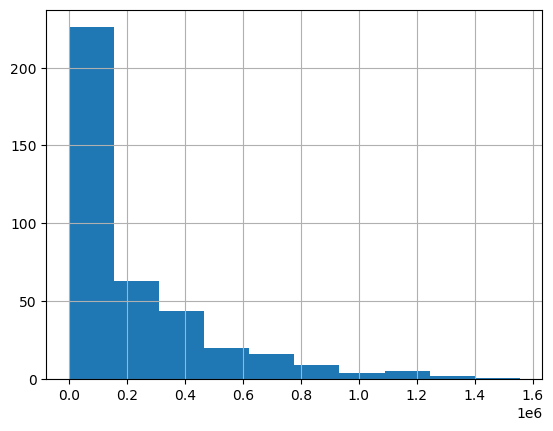

In [57]:
df["Inventory"].hist()

<Axes: >

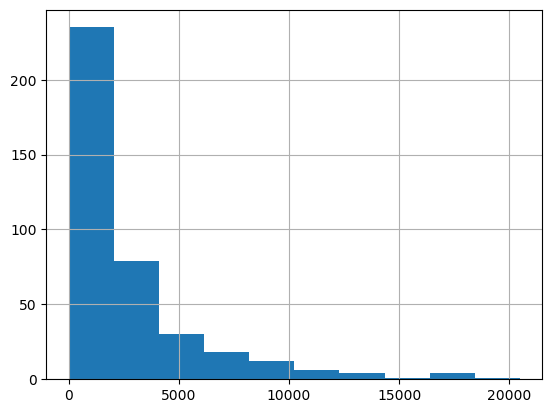

In [59]:
df["Returns"].hist()

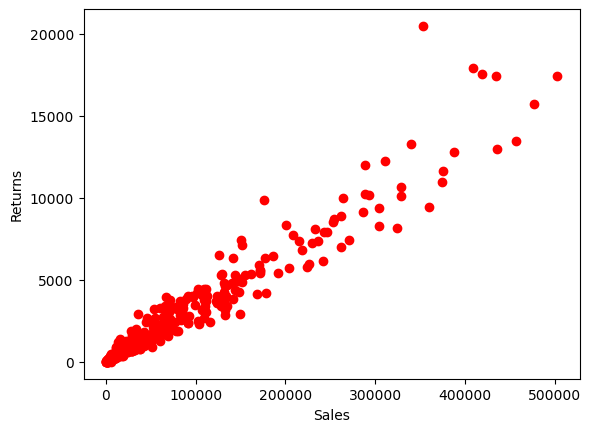

In [64]:
#scatter plot : -ve or +ve or no relationship 
plt.scatter(x=df["Sales"],y = df["Returns"],color = "red")
plt.xlabel("Sales")
plt.ylabel("Returns")
plt.show()

In [68]:
# To check correaltion between two variables
df[["Sales","Returns"]].corr()

,Sales,Returns
Sales,1.000000,0.966123
Returns,0.966123,1.000000


Text(0, 0.5, 'Returns')

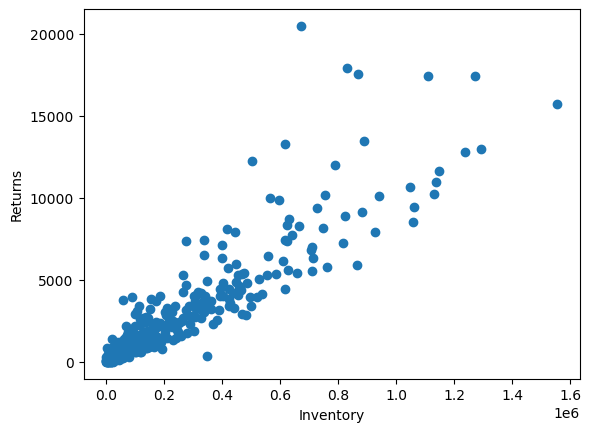

In [71]:
#inventory and returns
plt.scatter(df["Inventory"],df["Returns"])
plt.xlabel("Inventory")
plt.ylabel("Returns")


In [73]:
df[["Inventory","Sales"]].corr()

,Inventory,Sales
Inventory,1.000000,0.941193
Sales,0.941193,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0xaa06070>,
 'caps': [<matplotlib.lines.Line2D at 0xaa097f8>,
 'boxes': [<matplotlib.lines.Line2D at 0xaa04120>],
 'medians': [<matplotlib.lines.Line2D at 0xaa0cfe0>],
 'fliers': [<matplotlib.lines.Line2D at 0xaa0eba0>],
 'means': []}

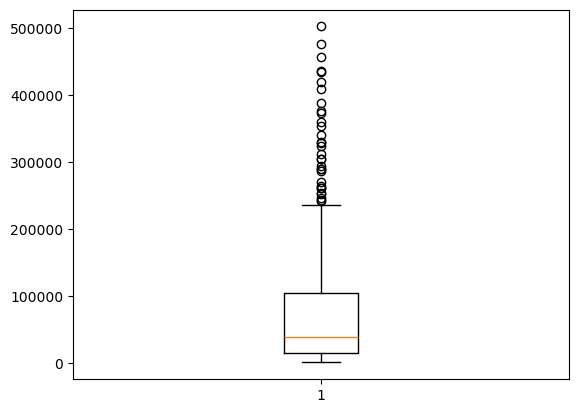

In [77]:
#box plot
plt.boxplot(df["Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0xaae9c68>,
 'caps': [<matplotlib.lines.Line2D at 0xaa9f298>,
 'boxes': [<matplotlib.lines.Line2D at 0xaa42698>],
 'medians': [<matplotlib.lines.Line2D at 0xaa2fac0>],
 'fliers': [<matplotlib.lines.Line2D at 0xaa00bf0>],
 'means': []}

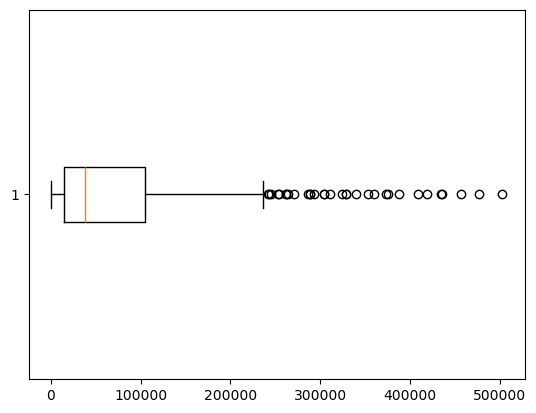

In [79]:
#to see horizontal
plt.boxplot(df["Sales"],vert = False)

In [96]:
# how we can find outliers
import numpy as np
Q1 = np.percentile(df["Sales"],25)
Q3 = np.percentile(df["Sales"],75)
IQR = Q3-Q1
UW = Q3+(1.5*IQR)
LW =Q1 - (1.5*IQR)
print(UW)

238175.125


In [91]:
len(df["Sales"]>UW) #it gives false values which are not greater than upper whisker length

390

In [93]:
#the values greater than upper whisker length
df[df["Sales"]>UW]

,Region,Product,Subsidiary,Stores,Sales,Inventory,Returns
16,Africa,Men's Casual,Cairo,25,360209,1063251,9424
21,Africa,Women's Casual,Cairo,14,328474,940851,10124
99,Canada,Boot,Vancouver,31,286497,882080,9160
100,Canada,Men's Casual,Vancouver,25,353361,671837,20470
103,Canada,Women's Casual,Vancouver,20,304106,665323,8278
105,Central America/Caribbean,Men's Dress,Kingston,23,270863,618703,7447
107,Central America/Caribbean,Slipper,Kingston,37,476638,1555357,15713
110,Central America/Caribbean,Women's Dress,Kingston,41,375817,1147300,11656
159,Eastern Europe,Men's Casual,Warsaw,15,304093,729044,9364
167,Middle East,Men's Casual,Al-Khobar,24,340201,616745,13251


In [99]:
# To find out how many outliers are greater than upper whisker length
print("total number of outliers",len(df[df["Sales"]>UW]))

total number of outliers 32


In [104]:
df["Sales"][df["Sales"]>UW]

16     360209
21     328474
99     286497
100    353361
103    304106
105    270863
107    476638
110    375817
159    304093
167    340201
168    261445
173    241820
175    419336
176    324312
178    387680
181    435891
183    253814
187    288904
188    434496
205    373908
250    245757
289    408978
290    261607
292    329235
295    293313
305    263712
313    456985
316    252758
319    288972
334    502636
348    243342
353    311341
Name: Sales, dtype: int64

In [109]:
#Treating the outliers with upper whisker length
df["Sales"][df["Sales"]>UW] = int(UW)

<ipython-input-109-2dd0b0454757>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Sales"][df["Sales"]>UW] = int(UW)
<ipython-input-109-2dd0b0454757>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

{'whiskers': [<matplotlib.lines.Line2D at 0xa1a6eb0>,
 'caps': [<matplotlib.lines.Line2D at 0xa220948>,
 'boxes': [<matplotlib.lines.Line2D at 0x979ae08>],
 'medians': [<matplotlib.lines.Line2D at 0x7309208>],
 'fliers': [<matplotlib.lines.Line2D at 0xae5a1a0>],
 'means': []}

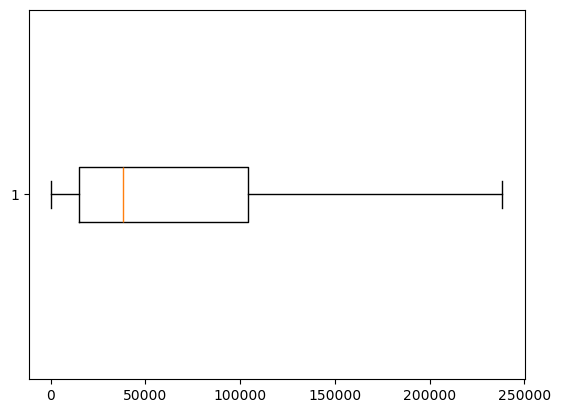

In [111]:
plt.boxplot(df["Sales"],vert=False)

In [113]:
#treating the outliers with mean values
df["Sales"][df["Sales"]>UW] = df["Sales"].mean()

<ipython-input-113-f2d6150b62ca>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Sales"][df["Sales"]>UW] = df["Sales"].mean()
<ipython-input-113-f2d6150b62ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

{'whiskers': [<matplotlib.lines.Line2D at 0xae731e8>,
 'caps': [<matplotlib.lines.Line2D at 0xa5b8ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0xa5a0160>],
 'medians': [<matplotlib.lines.Line2D at 0xaf2df68>],
 'fliers': [<matplotlib.lines.Line2D at 0xa59e330>],
 'means': []}

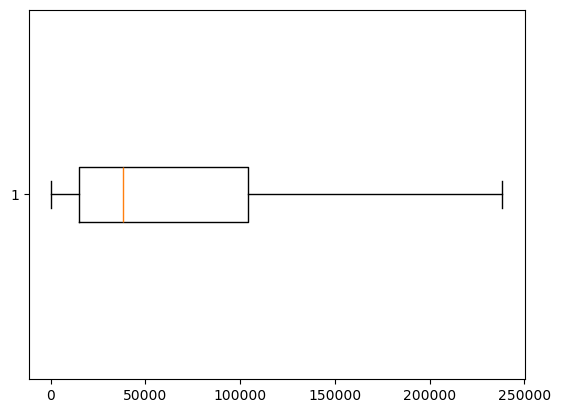

In [115]:
plt.boxplot(df["Sales"],vert = False)

In [117]:
len(df[df["Sales"]>UW])

0

In [119]:
df["Sales"]<LW

0      False
1      False
2      False
3      False
4      False
       ...  
385    False
386    False
387    False
388    False
389    False
Name: Sales, Length: 390, dtype: bool

In [121]:
df[df["Sales"]<LW]

,Region,Product,Subsidiary,Stores,Sales,Inventory,Returns


In [122]:
len(df[df["Sales"]<LW])

0